Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-217.03,-226.661,2.78652e-67
2,140.151,4.0,-214.157,-223.774,5.00039e-66
3,140.302,4.0,-211.312,-220.915,8.72134e-65
4,140.452,4.0,-208.496,-218.085,1.47843e-63
5,140.603,4.0,-205.708,-215.283,2.43587e-62
6,140.754,4.0,-202.949,-212.51,3.90073e-61
7,140.905,4.0,-200.218,-209.765,6.07122e-60
8,141.055,4.0,-197.515,-207.048,9.18425e-59
9,141.206,4.0,-194.841,-204.36,1.35036e-57


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,154.02,7.29648,-65.7198,-74.2653,0.426411
2,156.281,5.68844,-65.4019,-73.8182,0.66685
3,154.925,6.73367,-65.098,-73.5903,0.837546
4,155.226,5.76884,-65.0692,-73.5442,0.877005
5,157.035,5.60804,-66.1118,-74.4879,0.341314
6,155.678,6.09045,-64.9892,-73.4387,0.974636
7,156.281,8.50251,-66.6711,-75.0874,0.187418
8,153.568,9.06533,-67.5552,-76.128,0.0662036
9,155.226,4.88442,-66.3382,-74.8132,0.246555


### Snippet 4.23

Density of sigma

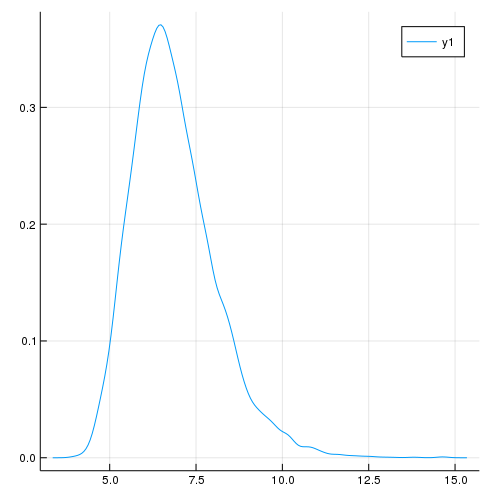

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*